<div align="center">
<h1>Analysis of housing prices dataset</h1>
</div>

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
%cd drive/'My Drive'/INRIA_Internship/Stage/Code

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/INRIA_Internship/Stage/Code


In [3]:
import numpy as np
import pandas as pd 
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#set 'png' here when working on notebook
%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Datasets

**Training Set**

In [4]:
train = pd.read_csv("housing_prices_train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Testing Set**

In [5]:
test = pd.read_csv("housing_prices_test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Goal 
Modelling the relationship between the output feature SalePrice which is a numerical variable from the $80$ input features characterizing the houses to be able to predict the unknown prices of any houses thanks to the unique knowledge of the input features. 

# Method
- Carry out a pre-processing on the features : encode the categorical features thanks to a onehot encoding in order to be able to feed the model with numerical variables
- Analyze the features that are the more relevant to explain the target which corresonds to the SalePrice thanks to plots, histograms, PCA and other methods.... 
- Choose the model which is the more relevant to describe the relationship linking the target to the input features : the target is a continuous variable then one uses a regression method (multivariate linear, multivariate non-linear : polynomial ...)
- Train the model on the training set since one knows the target feature in order to estimate in an accurate way the parameters of the model
- Test the model on the cross-validation set : one has not trained the model on this dataset but one knows the target variable then one can assess the performance of the model
- Run the model on the test set for which one does not know the target feature and the task is to predict the target values of the output feature SalePrice.

# Data Pre-Processing

- First, transform the skewed numeric features by taking $\log(feature + 1)$ : this will make the features more normal 
- Then create dummy variables for the categorical features 
- Replace the numeric missing values (NaN's) with the mean of their respective columns 

**Dummy Variables** 

In regression analysis, a dummy variable is one that takes only the value $0$ or $1$ to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. They can be thought of as numeric stand-ins for qualitative facts in a regression model, sorting data into mutually exclusive categories (such as smoker and non-smoker).

A dummy independent variable (also called a dummy explanatory variable) which for some observation has a value of $0$ will xause that variable's coefficient to have no role in influencing the dependent variable, while when the dummy takes on a value $1$ its coefficient acts to alter the intercept.

For example, suppose membership in a group is one of the qualitative variables relevant to a regression. If group membership is arbitrarily assigned the value of $1$, then all others would get the value $0$. Then the intercept would be the constant term for non-members but would be the constant term plus the coefficient of the membership dummy in the case of group members. 

Ref : https://en.wikipedia.org/wiki/Dummy_variable_(statistics)

**All Data**

In [6]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Plots of housing prices 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbff212a7f0>,
      dtype=object)

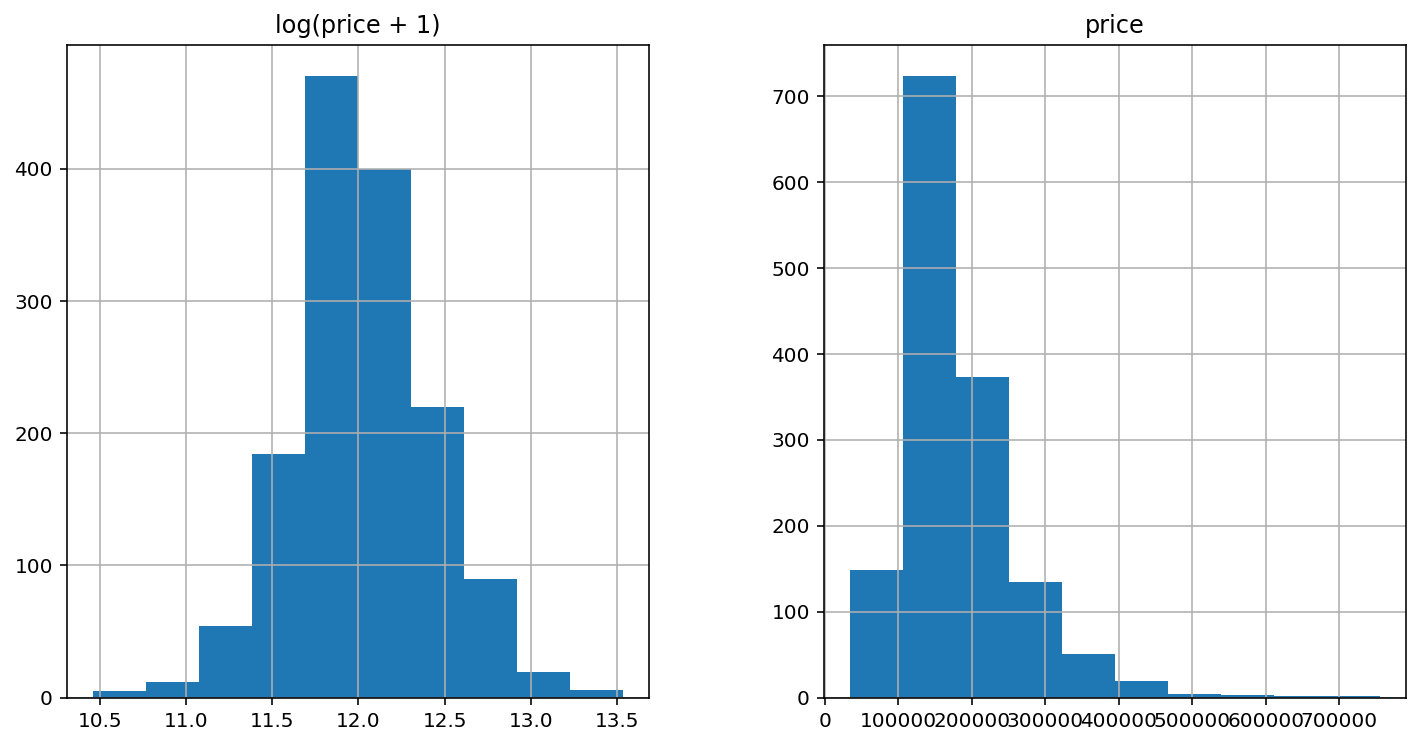

In [7]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

**Log Transform The Target**



In [0]:
train["SalePrice"] = np.log1p(train["SalePrice"])

**Collect the numerical features**

In [9]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

**Skewness**

In proba theory and statistics, skewness is a measure of the asymmetry of the proba distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

For a unimodal distribution (Unimodality means possessing a unique mode. More generally, unimodality means there is only a single highest value somehow defined, of some mathematical object), negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates taht the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. for example, a zero value means that the tails on both sides of the mean balance out overall, this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

Ref : https://en.wikipedia.org/wiki/Skewness

In [16]:
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) # The function DataFrame.dropna() removes missing values 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [18]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.631370,RL,1.646667,2.306780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.837880,Gd,TA,PConc,Gd,TA,No,GLQ,2.023008,Unf,0.0,1.794635,2.048136,GasA,Ex,Y,SBrkr,2.048136,2.047835,0.0,2.133555,1.0,0.000000,2,1,3,0.526589,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,1.634547,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,1.397363,RL,1.685370,2.319405,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,2.065156,Unf,0.0,1.894991,2.096943,GasA,Ex,Y,SBrkr,2.096943,0.000000,0.0,2.096943,0.0,0.526589,2,0,3,0.526589,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,1.902174,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,1.631370,RL,1.655196,2.334879,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.807264,Gd,TA,PConc,Gd,TA,Mn,GLQ,1.972450,Unf,0.0,1.956616,2.057383,GasA,Ex,Y,SBrkr,2.057383,2.049631,0.0,2.138688,1.0,0.000000,2,1,3,0.526589,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,1.560500,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,1.660640,RL,1.631370,2.318892,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,1.853152,Unf,0.0,1.986972,2.032004,GasA,Gd,Y,SBrkr,2.062933,2.032004,0.0,2.134038,1.0,0.000000,1,0,3,0.526589,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,1.522467,1.888504,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,1.631370,RL,1.694266,2.357574,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.925822,Gd,TA,PConc,Gd,TA,Av,GLQ,2.013056,Unf,0.0,1.973587,2.084931,GasA,Ex,Y,SBrkr,2.084931,2.074473,0.0,2.162835,1.0,0.000000,2,1,4,0.526589,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,1.834610,1.694266,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [35]:
train[skewed_feats] = np.log1p(train[skewed_feats])
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1.631370,1.646667,2.306780,7,5,2003,2003,1.837880,2.023008,0.0,1.794635,2.048136,2.048136,2.047835,0.0,2.133555,1,0.000000,2,1,3,0.526589,8,0,2003.0,2,548,0.000000,1.634547,0.000000,0.0,0.0,0.0,0.0,2,2008,12.247699,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,1.397363,1.685370,2.319405,6,8,1976,1976,0.000000,2.065156,0.0,1.894991,2.096943,2.096943,0.000000,0.0,2.096943,0,0.526589,2,0,3,0.526589,6,1,1976.0,2,460,1.902174,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,12.109016,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,1.631370,1.655196,2.334879,7,5,2001,2002,1.807264,1.972450,0.0,1.956616,2.057383,2.057383,2.049631,0.0,2.138688,1,0.000000,2,1,3,0.526589,6,1,2001.0,2,608,0.000000,1.560500,0.000000,0.0,0.0,0.0,0.0,9,2008,12.317171,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,1.660640,1.631370,2.318892,7,5,1915,1970,0.000000,1.853152,0.0,1.986972,2.032004,2.062933,2.032004,0.0,2.134038,1,0.000000,1,0,3,0.526589,7,1,1998.0,3,642,0.000000,1.522467,1.888504,0.0,0.0,0.0,0.0,2,2006,11.849405,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,1.631370,1.694266,2.357574,8,5,2000,2000,1.925822,2.013056,0.0,1.973587,2.084931,2.084931,2.074473,0.0,2.162835,1,0.000000,2,1,4,0.526589,9,1,2000.0,3,836,1.834610,1.694266,0.000000,0.0,0.0,0.0,0.0,12,2008,12.429220,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [37]:
test[skewed_feats] = np.log1p(test[skewed_feats])
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,1.397363,1.685370,2.338024,5,6,1961,1961,0.000000,1.967197,1.787874,1.887391,2.051984,2.054003,0.000000,0.0,2.054003,0.0,0.0,1,0,2,0.526589,5,0,1961.0,1.0,730.0,1.783183,0.000000,0.0,0.0,1.757132,0.0,0.000000,6,2010,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,1.397363,1.687642,2.357620,6,6,1958,1958,1.738947,2.057798,0.000000,1.947168,2.103272,2.103272,0.000000,0.0,2.103272,0.0,0.0,1,1,3,0.526589,6,0,1958.0,1.0,312.0,1.942526,1.528427,0.0,0.0,0.000000,0.0,2.345028,6,2010,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,1.631370,1.671001,2.354672,5,5,1997,1998,0.000000,2.037911,0.000000,1.779561,2.058487,2.058487,2.022068,0.0,2.127795,0.0,0.0,2,1,3,0.526589,6,1,1997.0,2.0,482.0,1.850232,1.516302,0.0,0.0,0.000000,0.0,0.000000,3,2010,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,1.631370,1.680725,2.323195,6,6,1998,1998,1.397363,2.001739,0.000000,1.914541,2.058212,2.058212,2.017649,0.0,2.125953,0.0,0.0,2,1,3,0.526589,7,1,1998.0,2.0,470.0,1.929908,1.528427,0.0,0.0,0.000000,0.0,0.000000,6,2010,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,1.757132,1.565317,2.253226,8,5,1992,1992,0.000000,1.883419,0.000000,2.070097,2.098680,2.098680,0.000000,0.0,2.098680,0.0,0.0,2,0,2,0.526589,5,0,1992.0,2.0,506.0,0.000000,1.689882,0.0,0.0,1.787874,0.0,0.000000,1,2010,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


**One-Hot Encoding : Dummies**

The function $pandas.get\_dummies$ converts categorical variable into dummy / indicator variables i.e. one-hot encodes the categorical variables.
This pre-processing is required to be able to give these categorical variables as input variables of any regressors or classifiers.
The one-hot encoding allows to indicate the membership of a sample to a given category since when one one-hot encodes a categorical feature with n classes, for each sample, this feature becomes a vector containing only $0$'s except at the place corresponding to the category to which belongs the sample where the coefficient is equal to $1$. 

When one gives a one-hot encoded feature to a regressor model, for example, only the parameter of the regression assigned to the category to which belongs the given sample influences significatively the output variable since all the others parameters of the regression are inhibated since assigned to the $0$'s of the feature. Therefore, the variation of the output variable only depends on the parameter of the regression assigned to the category to which belongs the given sample. This would not be possible if one ordinal encodes the categorical feature instead of one-hot encoding it, since in this case all the parameters of the regression would play a role in the variation of the target even if the given sample does not belong to the other categories. Therefore, it is very difficult to properly predict the output value of the target from an ordinal encoded feature. 

In [31]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.631370,1.646667,2.306780,7,5,2003,2003,1.837880,2.023008,0.0,1.794635,2.048136,2.048136,2.047835,0.0,2.133555,1.0,0.000000,2,1,3,0.526589,8,0,2003.0,2.0,548.0,0.000000,1.634547,0.000000,0.0,0.0,0.0,0.0,2,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.397363,1.685370,2.319405,6,8,1976,1976,0.000000,2.065156,0.0,1.894991,2.096943,2.096943,0.000000,0.0,2.096943,0.0,0.526589,2,0,3,0.526589,6,1,1976.0,2.0,460.0,1.902174,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.631370,1.655196,2.334879,7,5,2001,2002,1.807264,1.972450,0.0,1.956616,2.057383,2.057383,2.049631,0.0,2.138688,1.0,0.000000,2,1,3,0.526589,6,1,2001.0,2.0,608.0,0.000000,1.560500,0.000000,0.0,0.0,0.0,0.0,9,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.660640,1.631370,2.318892,7,5,1915,1970,0.000000,1.853152,0.0,1.986972,2.032004,2.062933,2.032004,0.0,2.134038,1.0,0.000000,1,0,3,0.526589,7,1,1998.0,3.0,642.0,0.000000,1.522467,1.888504,0.0,0.0,0.0,0.0,2,2006,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1.631370,1.694266,2.357574,8,5,2000,2000,1.925822,2.013056,0.0,1.973587,2.084931,2.084931,2.074473,0.0,2.162835,1.0,0.000000,2,1,4,0.526589,9,1,2000.0,3.0,836.0,1.834610,1.694266,0.000000,0.0,0.0,0.0,0.0,12,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [43]:
train = pd.get_dummies(train)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1.631370,1.646667,2.306780,7,5,2003,2003,1.837880,2.023008,0.0,1.794635,2.048136,2.048136,2.047835,0.0,2.133555,1,0.000000,2,1,3,0.526589,8,0,2003.0,2,548,0.000000,1.634547,0.000000,0.0,0.0,0.0,0.0,2,2008,12.247699,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,1.397363,1.685370,2.319405,6,8,1976,1976,0.000000,2.065156,0.0,1.894991,2.096943,2.096943,0.000000,0.0,2.096943,0,0.526589,2,0,3,0.526589,6,1,1976.0,2,460,1.902174,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,12.109016,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,1.631370,1.655196,2.334879,7,5,2001,2002,1.807264,1.972450,0.0,1.956616,2.057383,2.057383,2.049631,0.0,2.138688,1,0.000000,2,1,3,0.526589,6,1,2001.0,2,608,0.000000,1.560500,0.000000,0.0,0.0,0.0,0.0,9,2008,12.317171,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,1.660640,1.631370,2.318892,7,5,1915,1970,0.000000,1.853152,0.0,1.986972,2.032004,2.062933,2.032004,0.0,2.134038,1,0.000000,1,0,3,0.526589,7,1,1998.0,3,642,0.000000,1.522467,1.888504,0.0,0.0,0.0,0.0,2,2006,11.849405,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,1.631370,1.694266,2.357574,8,5,2000,2000,1.925822,2.013056,0.0,1.973587,2.084931,2.084931,2.074473,0.0,2.162835,1,0.000000,2,1,4,0.526589,9,1,2000.0,3,836,1.834610,1.694266,0.000000,0.0,0.0,0.0,0.0,12,2008,12.429220,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [42]:
test = pd.get_dummies(test)
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,1.397363,1.685370,2.338024,5,6,1961,1961,0.000000,1.967197,1.787874,1.887391,2.051984,2.054003,0.000000,0.0,2.054003,0.0,0.0,1,0,2,0.526589,5,0,1961.0,1.0,730.0,1.783183,0.000000,0.0,0.0,1.757132,0.0,0.000000,6,2010,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,1.397363,1.687642,2.357620,6,6,1958,1958,1.738947,2.057798,0.000000,1.947168,2.103272,2.103272,0.000000,0.0,2.103272,0.0,0.0,1,1,3,0.526589,6,0,1958.0,1.0,312.0,1.942526,1.528427,0.0,0.0,0.000000,0.0,2.345028,6,2010,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,1.631370,1.671001,2.354672,5,5,1997,1998,0.000000,2.037911,0.000000,1.779561,2.058487,2.058487,2.022068,0.0,2.127795,0.0,0.0,2,1,3,0.526589,6,1,1997.0,2.0,482.0,1.850232,1.516302,0.0,0.0,0.000000,0.0,0.000000,3,2010,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,1.631370,1.680725,2.323195,6,6,1998,1998,1.397363,2.001739,0.000000,1.914541,2.058212,2.058212,2.017649,0.0,2.125953,0.0,0.0,2,1,3,0.526589,7,1,1998.0,2.0,470.0,1.929908,1.528427,0.0,0.0,0.000000,0.0,0.000000,6,2010,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,1.757132,1.565317,2.253226,8,5,1992,1992,0.000000,1.883419,0.000000,2.070097,2.098680,2.098680,0.000000,0.0,2.098680,0.0,0.0,2,0,2,0.526589,5,0,1992.0,2.0,506.0,0.000000,1.689882,0.0,0.0,1.787874,0.0,0.000000,1,2010,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


**Nan Values**

In [21]:
train.isna().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [22]:
test.isna().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 80, dtype: float64

**Filling NaN's values with the mean of the column**

In [0]:
all_data = all_data.fillna(all_data.mean())

In [25]:
all_data.isna().mean()

MSSubClass               0.0
LotFrontage              0.0
LotArea                  0.0
OverallQual              0.0
OverallCond              0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 288, dtype: float64

In [0]:
train = train.fillna(all_data.mean())

In [39]:
train.isna().mean()

Id                       0.0
MSSubClass               0.0
LotFrontage              0.0
LotArea                  0.0
OverallQual              0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 290, dtype: float64

In [0]:
test = test.fillna(all_data.mean())

In [41]:
test.isna().mean()

Id                       0.0
MSSubClass               0.0
LotFrontage              0.0
LotArea                  0.0
OverallQual              0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 271, dtype: float64

**Splitting Dataset : Creating matrices for sklearn**

In [0]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [48]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.631370,1.646667,2.306780,7,5,2003,2003,1.837880,2.023008,0.0,1.794635,2.048136,2.048136,2.047835,0.0,2.133555,1.0,0.000000,2,1,3,0.526589,8,0,2003.0,2.0,548.0,0.000000,1.634547,0.000000,0.0,0.0,0.0,0.0,2,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.397363,1.685370,2.319405,6,8,1976,1976,0.000000,2.065156,0.0,1.894991,2.096943,2.096943,0.000000,0.0,2.096943,0.0,0.526589,2,0,3,0.526589,6,1,1976.0,2.0,460.0,1.902174,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.631370,1.655196,2.334879,7,5,2001,2002,1.807264,1.972450,0.0,1.956616,2.057383,2.057383,2.049631,0.0,2.138688,1.0,0.000000,2,1,3,0.526589,6,1,2001.0,2.0,608.0,0.000000,1.560500,0.000000,0.0,0.0,0.0,0.0,9,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.660640,1.631370,2.318892,7,5,1915,1970,0.000000,1.853152,0.0,1.986972,2.032004,2.062933,2.032004,0.0,2.134038,1.0,0.000000,1,0,3,0.526589,7,1,1998.0,3.0,642.0,0.000000,1.522467,1.888504,0.0,0.0,0.0,0.0,2,2006,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1.631370,1.694266,2.357574,8,5,2000,2000,1.925822,2.013056,0.0,1.973587,2.084931,2.084931,2.074473,0.0,2.162835,1.0,0.000000,2,1,4,0.526589,9,1,2000.0,3.0,836.0,1.834610,1.694266,0.000000,0.0,0.0,0.0,0.0,12,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [49]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.397363,1.685370,2.338024,5,6,1961,1961,0.000000,1.967197,1.787874,1.887391,2.051984,2.054003,0.000000,0.0,2.054003,0.0,0.0,1,0,2,0.526589,5,0,1961.0,1.0,730.0,1.783183,0.000000,0.0,0.0,1.757132,0.0,0.000000,6,2010,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.397363,1.687642,2.357620,6,6,1958,1958,1.738947,2.057798,0.000000,1.947168,2.103272,2.103272,0.000000,0.0,2.103272,0.0,0.0,1,1,3,0.526589,6,0,1958.0,1.0,312.0,1.942526,1.528427,0.0,0.0,0.000000,0.0,2.345028,6,2010,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.631370,1.671001,2.354672,5,5,1997,1998,0.000000,2.037911,0.000000,1.779561,2.058487,2.058487,2.022068,0.0,2.127795,0.0,0.0,2,1,3,0.526589,6,1,1997.0,2.0,482.0,1.850232,1.516302,0.0,0.0,0.000000,0.0,0.000000,3,2010,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.631370,1.680725,2.323195,6,6,1998,1998,1.397363,2.001739,0.000000,1.914541,2.058212,2.058212,2.017649,0.0,2.125953,0.0,0.0,2,1,3,0.526589,7,1,1998.0,2.0,470.0,1.929908,1.528427,0.0,0.0,0.000000,0.0,0.000000,6,2010,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1.757132,1.565317,2.253226,8,5,1992,1992,0.000000,1.883419,0.000000,2.070097,2.098680,2.098680,0.000000,0.0,2.098680,0.0,0.0,2,0,2,0.526589,5,0,1992.0,2.0,506.0,0.000000,1.689882,0.0,0.0,1.787874,0.0,0.000000,1,2010,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [51]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

# Data Analysis

**Correlations**

In [59]:
corrMatrix = train.corr()
print(corrMatrix)

                             Id  ...  SaleCondition_Partial
Id                     1.000000  ...              -0.020738
MSSubClass             0.014519  ...              -0.069459
LotFrontage           -0.020490  ...               0.152943
LotArea               -0.016916  ...               0.062283
OverallQual           -0.028365  ...               0.323295
...                         ...  ...                    ...
SaleCondition_AdjLand -0.034852  ...              -0.016038
SaleCondition_Alloca  -0.009018  ...              -0.027856
SaleCondition_Family   0.004865  ...              -0.036062
SaleCondition_Normal   0.015881  ...              -0.654323
SaleCondition_Partial -0.020738  ...               1.000000

[290 rows x 290 columns]


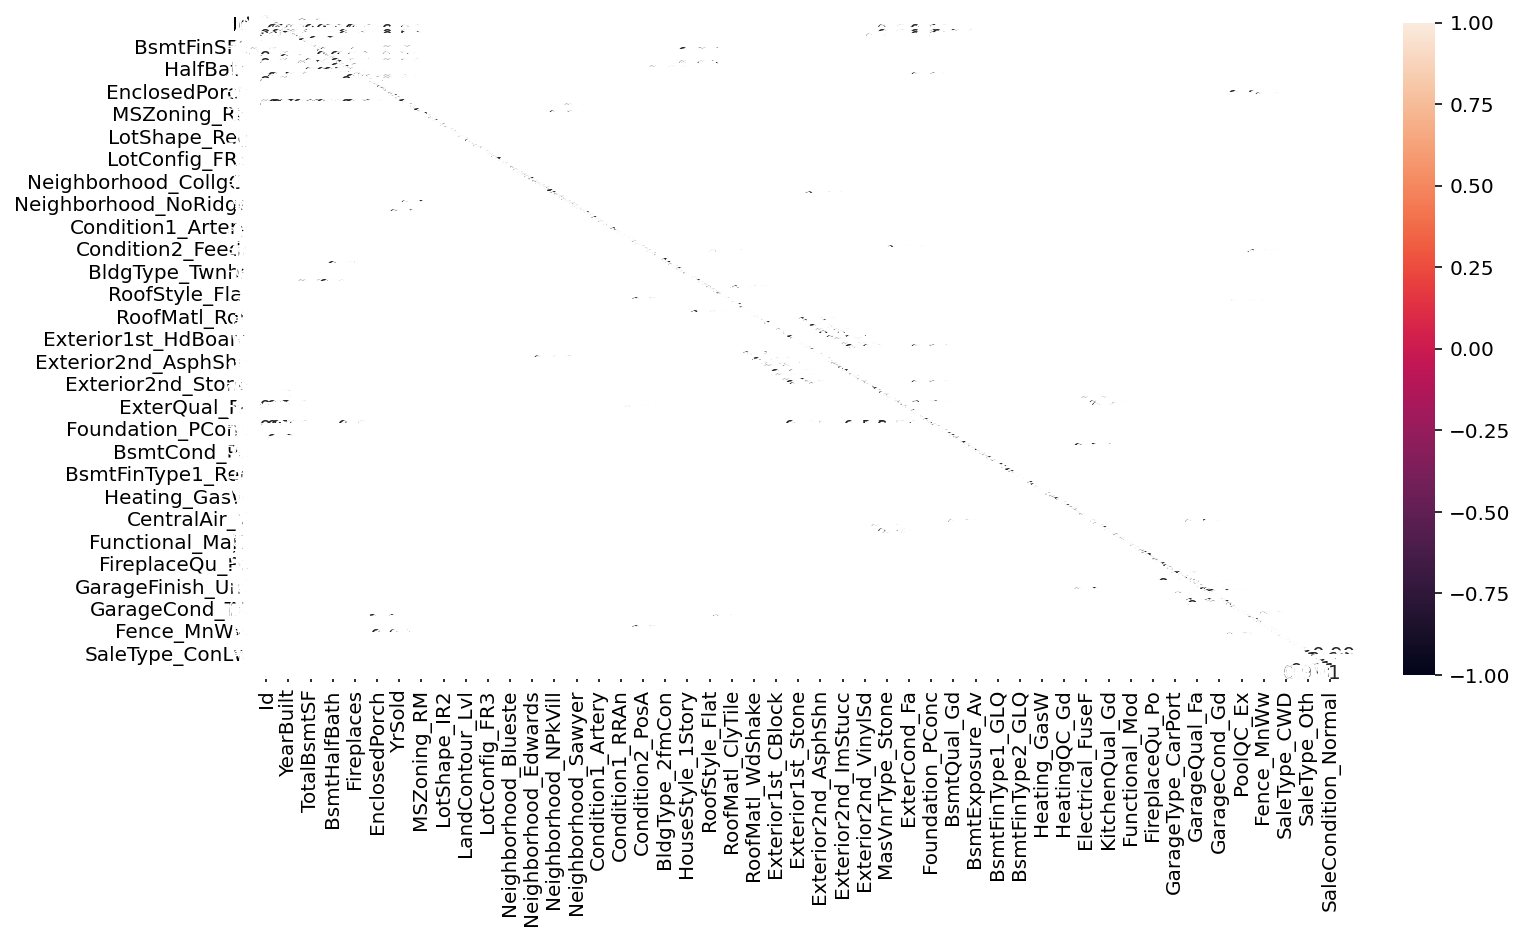

In [61]:
sns.heatmap(corrMatrix, annot=True)
plt.show()